### YOLO (You Only Look Once)
- 실시간 객체 탐지 모델
- 버전 별 특징
    - v1 : Anchor Free
    - v2 : Anchor based
    - v3 : Anchor based, 다중 스케일 (feature 피라미드)
    - v5 : down sizing (효율 증대)

- V1
    - Inception-Net based      
    - 7 by 7 by 1024 형태의 feature map
    - 하나의 셀, 하나의 객체 탐지
    - 하나의 셀, 두 개의 후보 BB 예측
    - PASCAL VOC 데이터 셋 사용   
- V2
    - Anchor Box
        - 각 셀마다 5 개의 Anchor Box
        - K-means Clustering 으로 Anchor Box 결정
    - Pass-Through Module
        - 작은 object 탐지 (Skip connection 과 비슷)
    - Feature extractor
        - Darknet-19 Based 모델
    - Multi-scale Training
        - 여러 해상도 객체 검출
        - 10회 배치마다 동적으로 변경
- V3
    - 구조
    - 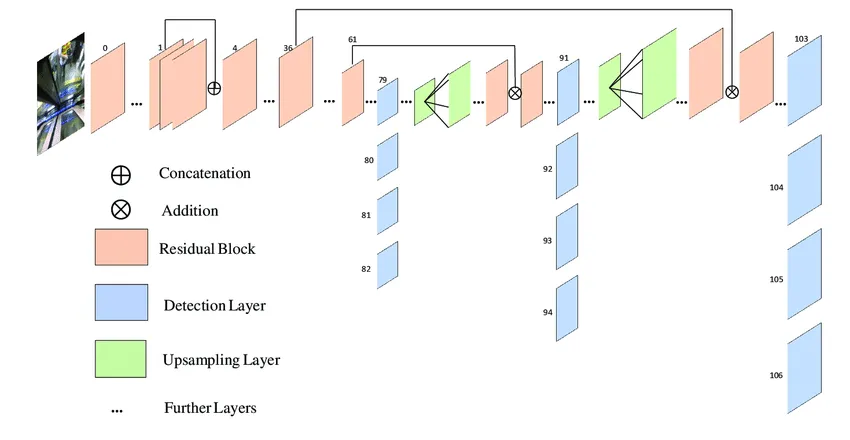
    - 잔차 블록  이용
    - 업 샘플링
    - 멀티 스케일 예측
    - 3 개의 feature map 이용 ⇒ detection
        - 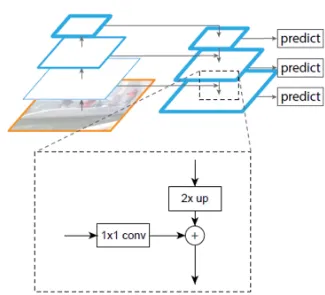
        - feature pyramid network            
            - 13 x 13, 26 x 26, 52 x 52 feature map
            - 이전 feature map 과 up scaled feature map 을 Concat
    - Darknet-53 backbone based : Resnet 개선한 모델
### 버전 별 비교
- 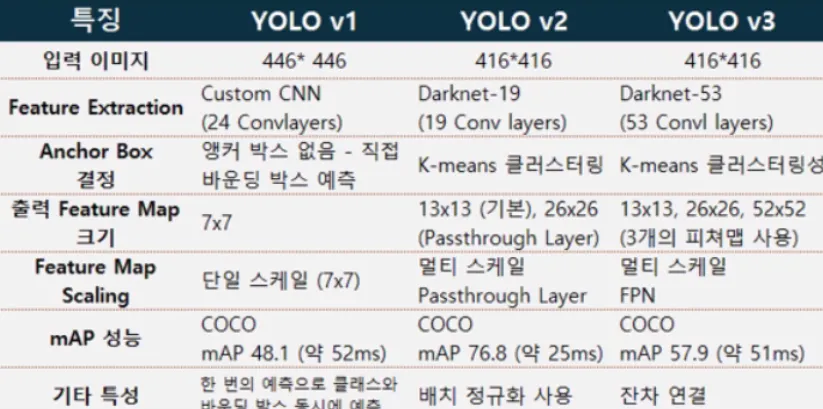

### YOLO with Robotics

In [1]:
# from roboflow import Roboflow
from ultralytics import YOLO

# rf = Roboflow(api_key="ns847mLqLezwQKHjnKnB")
# project = rf.workspace("testwork-c53wf").project("test__-yse95")
# version = project.version(1)
# dataset = version.download("yolov5")

In [2]:
from pathlib import Path

rel_path = "roboflow_yolo/test__-1/data.yaml"
full_path = Path(rel_path).resolve()
model = YOLO("roboflow_yolo/yolov8n.pt")

In [10]:
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [19]:

model.train(data=full_path, epochs=100, imgsz=640, plots=True)

Ultralytics YOLOv8.2.76 🚀 Python-3.11.0 torch-2.4.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12287MiB)
engine/trainer: task=detect, mode=train, model=roboflow_yolo/yolov8n.pt, data=/mnt/e/py_data/roboflow_yolo/test__-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_

100%|████████████████████████████████████████████████████████████████████████████| 6.25M/6.25M [00:00<00:00, 7.00MB/s]


AMP: checks passed ✅


train: Scanning /mnt/e/py_data/roboflow_yolo/test__-1/train/labels.cache... 63 images, 0 backgrounds, 0 corrupt: 100%|
val: Scanning /mnt/e/py_data/roboflow_yolo/test__-1/valid/labels.cache... 6 images, 0 backgrounds, 0 corrupt: 100%|███


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.18G      1.813      3.607      1.726         65        640: 100%|██████████| 4/4 [00:01<00:00,  3.3
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14    0.00335      0.429      0.189      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100       2.1G      1.647      3.578      1.612         71        640: 100%|██████████| 4/4 [00:01<00:00,  3.8
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14    0.00287      0.357     0.0923     0.0398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.08G      1.432      3.174      1.446         64        640: 100%|██████████| 4/4 [00:00<00:00,  4.4
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14    0.00416        0.5      0.268      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100       2.1G      1.463      2.396      1.376         79        640: 100%|██████████| 4/4 [00:00<00:00,  4.6
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.871      0.207      0.223      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       2.1G      1.345      1.791      1.315         63        640: 100%|██████████| 4/4 [00:00<00:00,  5.4
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14          1      0.152      0.292      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.12G      1.315      1.657       1.27         66        640: 100%|██████████| 4/4 [00:00<00:00,  5.0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14     0.0036      0.429      0.212      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.08G      1.262       1.62      1.247         78        640: 100%|██████████| 4/4 [00:00<00:00,  4.9
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14    0.00355      0.429      0.237      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.06G      1.195      1.414      1.158         81        640: 100%|██████████| 4/4 [00:00<00:00,  5.3
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.899      0.214       0.28      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.07G      1.181      1.251      1.171         69        640: 100%|██████████| 4/4 [00:00<00:00,  5.8
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14    0.00449      0.571      0.194       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.08G      1.164      1.318      1.201         61        640: 100%|██████████| 4/4 [00:00<00:00,  5.4
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14    0.00344      0.429     0.0548     0.0282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100       2.1G      1.229      1.371      1.226         75        640: 100%|██████████| 4/4 [00:00<00:00,  5.1
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14    0.00406        0.5     0.0896     0.0394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100       2.1G      1.312      1.309      1.209         54        640: 100%|██████████| 4/4 [00:00<00:00,  4.8
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14    0.00394        0.5     0.0779     0.0392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100       2.1G      1.251      1.226      1.255         78        640: 100%|██████████| 4/4 [00:00<00:00,  5.2
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14    0.00327      0.429     0.0791     0.0304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.13G      1.189      1.109      1.158         76        640: 100%|██████████| 4/4 [00:00<00:00,  5.3
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.792     0.0714     0.0817     0.0257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.09G      1.179      1.187      1.206         55        640: 100%|██████████| 4/4 [00:00<00:00,  5.4
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.809      0.143      0.198     0.0562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.08G       1.12      1.109       1.13         88        640: 100%|██████████| 4/4 [00:00<00:00,  5.3
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14       0.97      0.214      0.309       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.14G       1.13      1.061      1.157         63        640: 100%|██████████| 4/4 [00:00<00:00,  6.3
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.995      0.286      0.349      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.11G      1.108      1.052      1.103         59        640: 100%|██████████| 4/4 [00:00<00:00,  5.6
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.844      0.319      0.453      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.11G      1.105      1.023      1.145         58        640: 100%|██████████| 4/4 [00:00<00:00,  5.7
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.954      0.286      0.377       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.09G       1.15      1.154      1.189         71        640: 100%|██████████| 4/4 [00:00<00:00,  5.8
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14          1      0.276      0.339      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.11G      1.141      1.139      1.219         66        640: 100%|██████████| 4/4 [00:00<00:00,  5.6
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.987      0.357      0.682      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.11G      1.056      1.006      1.171         63        640: 100%|██████████| 4/4 [00:00<00:00,  5.4
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14          1      0.348      0.742      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.09G      1.102      1.029      1.165        117        640: 100%|██████████| 4/4 [00:00<00:00,  4.9
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.977      0.286      0.664      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.11G      1.082     0.9475      1.131         73        640: 100%|██████████| 4/4 [00:00<00:00,  5.2
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14        0.8      0.429      0.604      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.09G      1.029      1.002      1.125         72        640: 100%|██████████| 4/4 [00:00<00:00,  4.9
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.827      0.514      0.736      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.11G      1.085      1.048      1.112         64        640: 100%|██████████| 4/4 [00:00<00:00,  6.0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14       0.77      0.624      0.747        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.11G      1.116     0.9621      1.137         64        640: 100%|██████████| 4/4 [00:00<00:00,  5.5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.696      0.714      0.749       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.12G      1.081     0.9928      1.121         73        640: 100%|██████████| 4/4 [00:00<00:00,  5.0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.761      0.772      0.773       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.09G     0.9914     0.9075      1.085         78        640: 100%|██████████| 4/4 [00:00<00:00,  5.7
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.799      0.674      0.792      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.11G      1.051     0.9671      1.119         46        640: 100%|██████████| 4/4 [00:00<00:00,  5.8
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14       0.87      0.612      0.802      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.12G      1.003     0.9244      1.128         77        640: 100%|██████████| 4/4 [00:00<00:00,  5.8
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.921      0.697      0.838      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.11G     0.9928     0.8778      1.072         67        640: 100%|██████████| 4/4 [00:00<00:00,  5.5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.824      0.743      0.847      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.11G      1.079      0.906      1.087         54        640: 100%|██████████| 4/4 [00:00<00:00,  5.6
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14       0.82      0.703       0.72      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.11G      1.017     0.8533      1.054         73        640: 100%|██████████| 4/4 [00:00<00:00,  5.5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.639      0.643      0.717      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.11G      1.032     0.8957      1.128         51        640: 100%|██████████| 4/4 [00:00<00:00,  5.3
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.606      0.786      0.783      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.11G     0.9241     0.8745      1.044         70        640: 100%|██████████| 4/4 [00:00<00:00,  6.1
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.625      0.796      0.777      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.11G     0.9212     0.8377      1.038         69        640: 100%|██████████| 4/4 [00:00<00:00,  5.6
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.665      0.817      0.757      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.11G      0.907     0.8415      1.051         37        640: 100%|██████████| 4/4 [00:00<00:00,  4.8
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14       0.68      0.723      0.768      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.11G     0.9562     0.8296       1.04         72        640: 100%|██████████| 4/4 [00:00<00:00,  5.6
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.691      0.714      0.757      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.11G     0.8976     0.8022      1.035         59        640: 100%|██████████| 4/4 [00:00<00:00,  5.8
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.662      0.714      0.766      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.09G     0.9256     0.7863      1.031         84        640: 100%|██████████| 4/4 [00:00<00:00,  5.2
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.726      0.714      0.774      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.07G     0.9302     0.8375      1.055         54        640: 100%|██████████| 4/4 [00:00<00:00,  5.4
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.853      0.773      0.817      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.09G     0.9192      0.756      1.026         57        640: 100%|██████████| 4/4 [00:00<00:00,  5.5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.808      0.786      0.835      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.11G     0.8499     0.7376      1.022         71        640: 100%|██████████| 4/4 [00:00<00:00,  5.6
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.806      0.929      0.886      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.09G     0.8898     0.8064      1.054         79        640: 100%|██████████| 4/4 [00:00<00:00,  5.8
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.866      0.929      0.895      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.11G     0.8713     0.7856      1.013         64        640: 100%|██████████| 4/4 [00:00<00:00,  5.5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.931      0.929      0.925      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.11G     0.8665     0.7222      1.032         68        640: 100%|██████████| 4/4 [00:00<00:00,  5.0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.696      0.857      0.896      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.11G     0.8695     0.7404      1.035         72        640: 100%|██████████| 4/4 [00:00<00:00,  5.4
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.791      0.784      0.845      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.09G     0.8933     0.8006      1.072         60        640: 100%|██████████| 4/4 [00:00<00:00,  5.5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.794      0.814      0.835       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.09G     0.8853     0.7432      1.022         51        640: 100%|██████████| 4/4 [00:00<00:00,  5.3
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.754      0.857      0.863      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.11G     0.8227     0.6979      1.021         81        640: 100%|██████████| 4/4 [00:00<00:00,  6.1
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.753      0.929      0.883       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.09G     0.8379      0.701      1.023         79        640: 100%|██████████| 4/4 [00:00<00:00,  4.8
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.796      0.903        0.9      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.11G     0.8118     0.6927      1.011         53        640: 100%|██████████| 4/4 [00:00<00:00,  5.5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14       0.84      0.877      0.907      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.09G     0.8072     0.6953      1.012         66        640: 100%|██████████| 4/4 [00:00<00:00,  5.6
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.973      0.915      0.925      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.09G     0.8096      0.713     0.9944         72        640: 100%|██████████| 4/4 [00:00<00:00,  6.1
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.973      0.916      0.925      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.11G     0.8207     0.7289      1.014         56        640: 100%|██████████| 4/4 [00:00<00:00,  6.1
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.916      0.918      0.905       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.12G     0.7888      0.673      1.005         53        640: 100%|██████████| 4/4 [00:00<00:00,  6.3
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.918      0.919      0.895      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.12G     0.7988     0.6654       1.01         68        640: 100%|██████████| 4/4 [00:00<00:00,  5.5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14       0.92      0.922      0.895      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.09G     0.7654     0.6513     0.9695         82        640: 100%|██████████| 4/4 [00:00<00:00,  5.3
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.918      0.909      0.905      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.09G     0.8033     0.6456      1.019         65        640: 100%|██████████| 4/4 [00:00<00:00,  6.1
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.904      0.907      0.895      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.12G     0.7881     0.6387     0.9742         75        640: 100%|██████████| 4/4 [00:00<00:00,  5.5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.924      0.921      0.905       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.09G     0.7833     0.6355     0.9802         67        640: 100%|██████████| 4/4 [00:00<00:00,  5.6
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.924      0.918      0.895      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.12G     0.7854     0.6352     0.9825         54        640: 100%|██████████| 4/4 [00:00<00:00,  6.1
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.912      0.929      0.905      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.09G     0.8395     0.6187     0.9698         85        640: 100%|██████████| 4/4 [00:00<00:00,  5.8
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.883      0.929      0.915      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.11G     0.7931     0.6247     0.9788         53        640: 100%|██████████| 4/4 [00:00<00:00,  5.4
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.978      0.846      0.908      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.12G     0.8286      0.694     0.9892         45        640: 100%|██████████| 4/4 [00:00<00:00,  5.8
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.988      0.885      0.925      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.09G     0.7625     0.6178     0.9777         71        640: 100%|██████████| 4/4 [00:00<00:00,  5.7
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.962      0.917      0.925      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.09G      0.788     0.6305      1.006         61        640: 100%|██████████| 4/4 [00:00<00:00,  5.9
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.952      0.856      0.917       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.09G     0.8133     0.6754      1.026         49        640: 100%|██████████| 4/4 [00:00<00:00,  6.0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.956      0.839      0.904      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.11G     0.9006     0.6561     0.9714         58        640: 100%|██████████| 4/4 [00:00<00:00,  5.7
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.878      0.807      0.874      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.11G     0.8073     0.6532     0.9568         62        640: 100%|██████████| 4/4 [00:00<00:00,  6.2
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.888      0.786      0.873      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.09G     0.7269     0.6125     0.9748         60        640: 100%|██████████| 4/4 [00:00<00:00,  5.7
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14        0.9      0.786      0.862      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.09G     0.8199     0.6196     0.9996         71        640: 100%|██████████| 4/4 [00:00<00:00,  6.2
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.958       0.78       0.86       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.11G     0.8061     0.6207      1.025         60        640: 100%|██████████| 4/4 [00:00<00:00,  5.5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.816      0.857      0.859      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.09G      0.712     0.5973     0.9663         74        640: 100%|██████████| 4/4 [00:00<00:00,  6.0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.871      0.915      0.896        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.11G     0.7178     0.5845     0.9688         67        640: 100%|██████████| 4/4 [00:00<00:00,  6.1
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.874      0.915      0.896      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.12G     0.7589     0.6048     0.9715         67        640: 100%|██████████| 4/4 [00:00<00:00,  5.8
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.926      0.896      0.915      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.09G     0.7094     0.5749     0.9761         58        640: 100%|██████████| 4/4 [00:00<00:00,  6.0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.919      0.917      0.915      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.11G     0.6874     0.5632     0.9405         76        640: 100%|██████████| 4/4 [00:00<00:00,  5.2
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.865      0.917      0.908      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.09G     0.6993     0.5765     0.9541         76        640: 100%|██████████| 4/4 [00:00<00:00,  5.8
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.988      0.815      0.908      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.09G     0.7046     0.5945     0.9779         61        640: 100%|██████████| 4/4 [00:00<00:00,  6.0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.861      0.921      0.896      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.09G     0.7335     0.6103      1.007         68        640: 100%|██████████| 4/4 [00:00<00:00,  6.0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.869      0.838      0.897      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.11G     0.6755     0.5679     0.9421         66        640: 100%|██████████| 4/4 [00:00<00:00,  5.3
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.868      0.786      0.887      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.11G     0.6542     0.5254     0.9494         84        640: 100%|██████████| 4/4 [00:00<00:00,  5.1
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.797      0.857      0.867      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.09G     0.6844     0.5521     0.9469         75        640: 100%|██████████| 4/4 [00:00<00:00,  5.4
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.963      0.781      0.887      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.12G     0.6819     0.5673      0.968         60        640: 100%|██████████| 4/4 [00:00<00:00,  5.9
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.963      0.786        0.9      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.11G     0.6711     0.5387     0.9603         77        640: 100%|██████████| 4/4 [00:00<00:00,  5.7
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.952      0.844       0.91      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.11G      0.704     0.5919     0.9838         65        640: 100%|██████████| 4/4 [00:00<00:00,  5.3
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.952      0.846       0.91      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.09G     0.6486     0.5489     0.9389         61        640: 100%|██████████| 4/4 [00:00<00:00,  6.0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.951      0.846       0.91      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.11G     0.6653     0.5202     0.9282         53        640: 100%|██████████| 4/4 [00:00<00:00,  6.0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14       0.95      0.847       0.91      0.639


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.07G     0.5933     0.5225     0.8792         38        640: 100%|██████████| 4/4 [00:01<00:00,  2.3
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<


                   all          6         14      0.949      0.847       0.91      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.07G     0.5965       0.55     0.9177         42        640: 100%|██████████| 4/4 [00:00<00:00,  5.4
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.949      0.847      0.917      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.07G     0.6357     0.5533     0.9036         42        640: 100%|██████████| 4/4 [00:00<00:00,  6.0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.949      0.847      0.917      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.07G      0.555     0.5223     0.8984         48        640: 100%|██████████| 4/4 [00:00<00:00,  5.3
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.949      0.846      0.917      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.07G     0.5782     0.5283     0.9113         42        640: 100%|██████████| 4/4 [00:00<00:00,  5.4
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14       0.95      0.846      0.917      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.07G     0.5751     0.5212      0.893         40        640: 100%|██████████| 4/4 [00:00<00:00,  5.8
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14       0.95      0.846      0.917      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.07G     0.5466      0.526     0.9049         38        640: 100%|██████████| 4/4 [00:00<00:00,  5.4
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.951      0.847      0.917      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.07G     0.5873     0.5335     0.9233         48        640: 100%|██████████| 4/4 [00:00<00:00,  5.4
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.953      0.848      0.917      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.07G     0.5657     0.5306     0.8932         46        640: 100%|██████████| 4/4 [00:00<00:00,  5.2
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.955       0.85      0.917      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.07G     0.5329     0.5142     0.8862         50        640: 100%|██████████| 4/4 [00:00<00:00,  5.5
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<

                   all          6         14      0.996      0.903      0.925      0.666



100 epochs completed in 0.054 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.3MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.76 🚀 Python-3.11.0 torch-2.4.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12287MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<


                   all          6         14      0.995      0.903      0.925      0.666
                  face          6          7          1      0.949      0.995      0.826
                  nose          6          7      0.991      0.857      0.856      0.507
Speed: 0.5ms preprocess, 3.4ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fcc2188ca10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [13]:
model = YOLO('runs/detect/train/weights/best.pt')  # load a custom model


image 1/1 /mnt/e/py_data/data/_09_OD/images/Abyssinian_24.jpg: 480x640 1 face, 2 noses, 50.6ms
Speed: 4.2ms preprocess, 50.6ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)


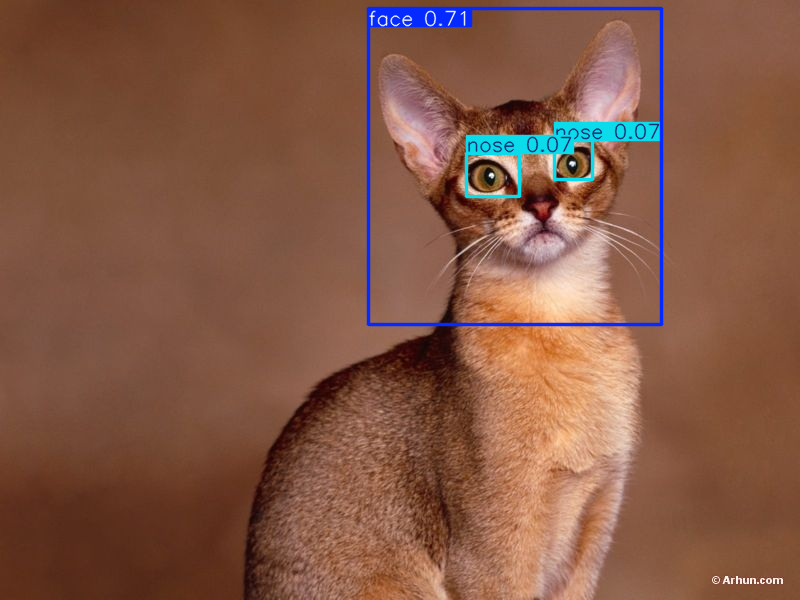

In [106]:
results = model.predict("data/_09_OD/images/Abyssinian_24.jpg", conf=0.05)  # predict on an image

from PIL import Image

# Show the results
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    im.show()  # show image
    # im.save('results.jpg')  # save image